#Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Import dataset

In [2]:
# Used Social_Net_class.csv dataset
df = pd.read_csv('Social_Net_class.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#Data Preprocessing

Check for Null values

In [4]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


##Remove columns which are not required

In this case, the column [User ID] is unique for each person and there is no relationship within these ID's which can be used for training the model.

Similarly the column [Gender] can be removed.

In [5]:
df.drop(columns=['User ID', 'Gender'], inplace = True, axis = 1)

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Separate dependent and independent variables

In [7]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [8]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

#Spliting the dataset into train and test dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#printing sizes of each
print(f'Size of X = {X.shape}')
print(f'Size of y = {y.shape}')
print(f'Size of X_train = {X_train.shape}')
print(f'Size of X_test = {X_test.shape}')
print(f'Size of y_train = {y_train.shape}')
print(f'Size of y_test = {y_test.shape}')

Size of X = (400, 2)
Size of y = (400,)
Size of X_train = (320, 2)
Size of X_test = (80, 2)
Size of y_train = (320,)
Size of y_test = (80,)


#Normalization

Scale down the data making it computationally easier for our model

In [12]:
#Create an instance of StandardScaler
scaler = StandardScaler()

scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [14]:
X_test

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886],
       [-0.96863208, -0.76450736],
       [ 0.99377543,  0.74814454],
       [-0.87051171, -1.22993871],
       [-0.77239133, -0.24089709],
       [ 0.89565505,  1.06812859],
       [-0.87051171,  0.36998156],
       [ 0.20881242,  0.13726589],
       [ 0.40505317, -0.15362871],
       [-0.28178945, -0.15362871],
       [ 1.4843773 , -1.05540195],
       [-1.45923396, -0.64814952],
       [-1.75359508, -1.37538601],
       [-0.77239133,  0.4863394 ],
       [-0.28178945,  1.09721805],
       [ 1.38625693, -0.93904411],
       [ 0.79753468,  0.10817643],
       [ 0.11069205, -0.82268628],
       [ 1.77873843, -0.29907601],
       [-1.55735433, -1.25902817],
       [-0.87051171,  0.28271318],
       [ 0.89565505, -1.37538601],
       [ 2.07309956,  0.16635535],
       [-1.85171546, -1.49174384],
       [ 1.28813655, -1.37538601],
       [ 0.40505317,  0.28271318],
       [-0.0855487 , -0.50270222],
       [ 1.68061805,

#Train a Decision Tree model

In [15]:
#create instance
classifier = DecisionTreeClassifier()

#train the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
#Evaluation the model
y_pred = classifier.predict(X_test)

In [17]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

[[46  6]
 [ 7 21]]
Accuracy: 0.8375


#Visualization

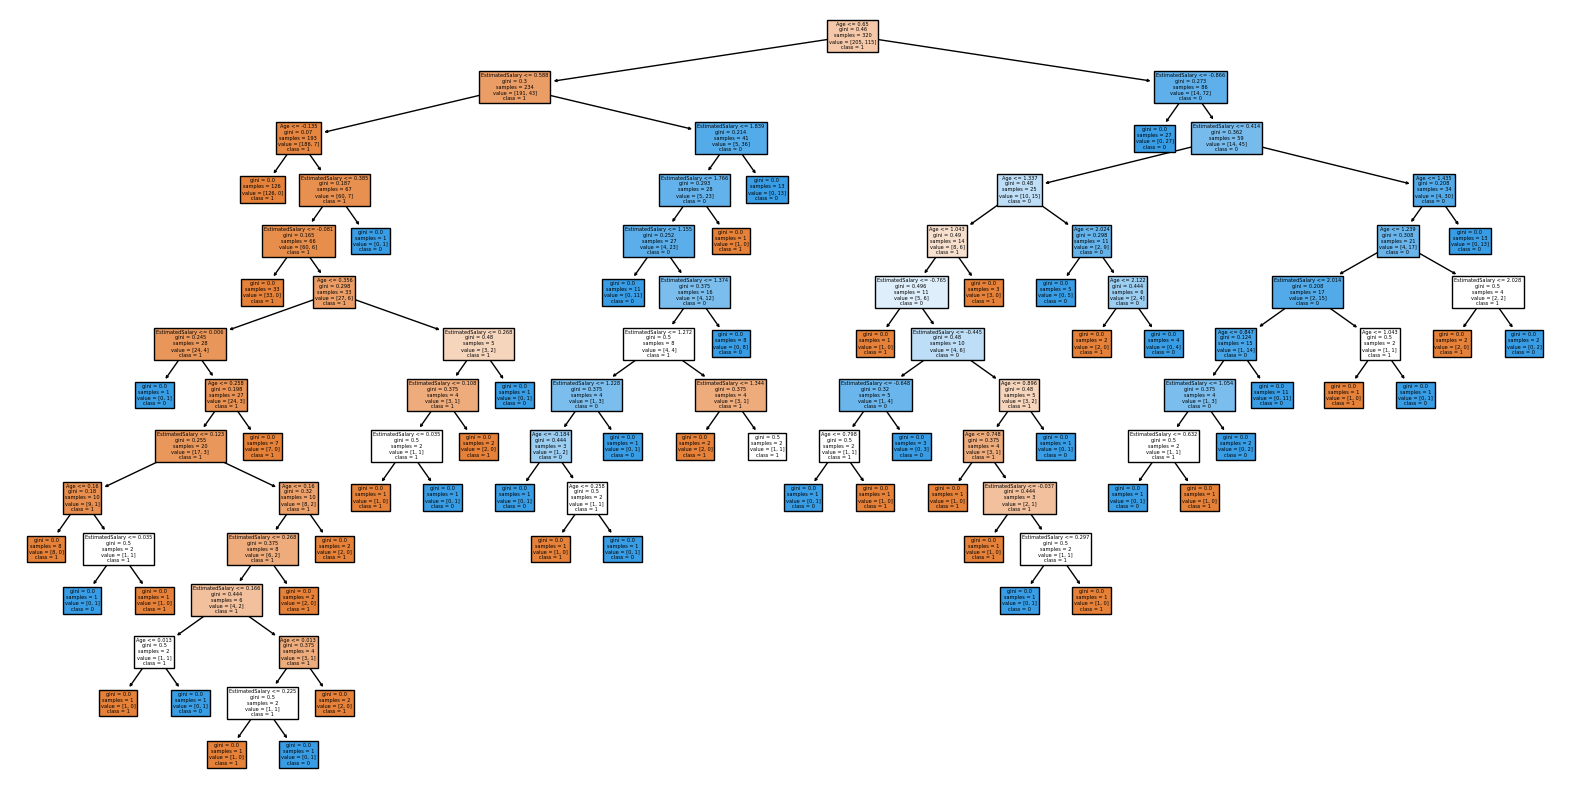

In [19]:
features = df[['Age', 'EstimatedSalary']]
classes = df['Purchased']

plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=['Age', 'EstimatedSalary'], class_names=['1', '0'])
plt.show()